In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from sklearn.preprocessing import StandardScaler
from trimkmeans.trimkmeans import TrimKMeans
from sklearn.cluster import KMeans
from sklearn import metrics

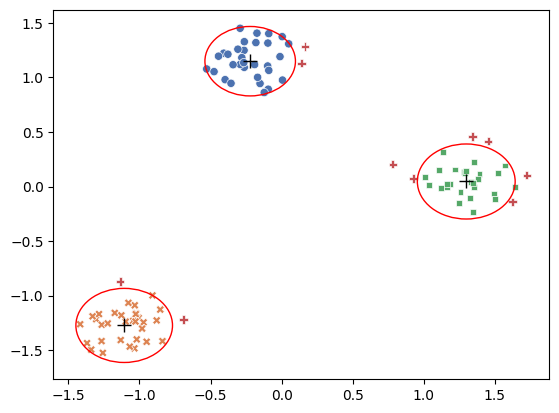

In [2]:
#trimmedkmeans 100 samples three centers
# Create a dataset of 2D distributions
centers = 3
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in trimkmeans.centroids],
         [y for _, y in trimkmeans.centroids],
         'k+',
         markersize=10,
         )

for idx, centroid in enumerate(trimkmeans.centroids):
    circle = plt.Circle(centroid, trimkmeans.cutoff_ranges[idx], fill=False, color='r')
    plt.gca().add_patch(circle)
plt.show()

In [3]:
%load_ext rpy2.ipython

Unable to determine R home: [WinError 2] Das System kann die angegebene Datei nicht finden
C:\Python310\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [4]:
#trimmedkmeans 100 samples three centers in r
#resolution setting from https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook

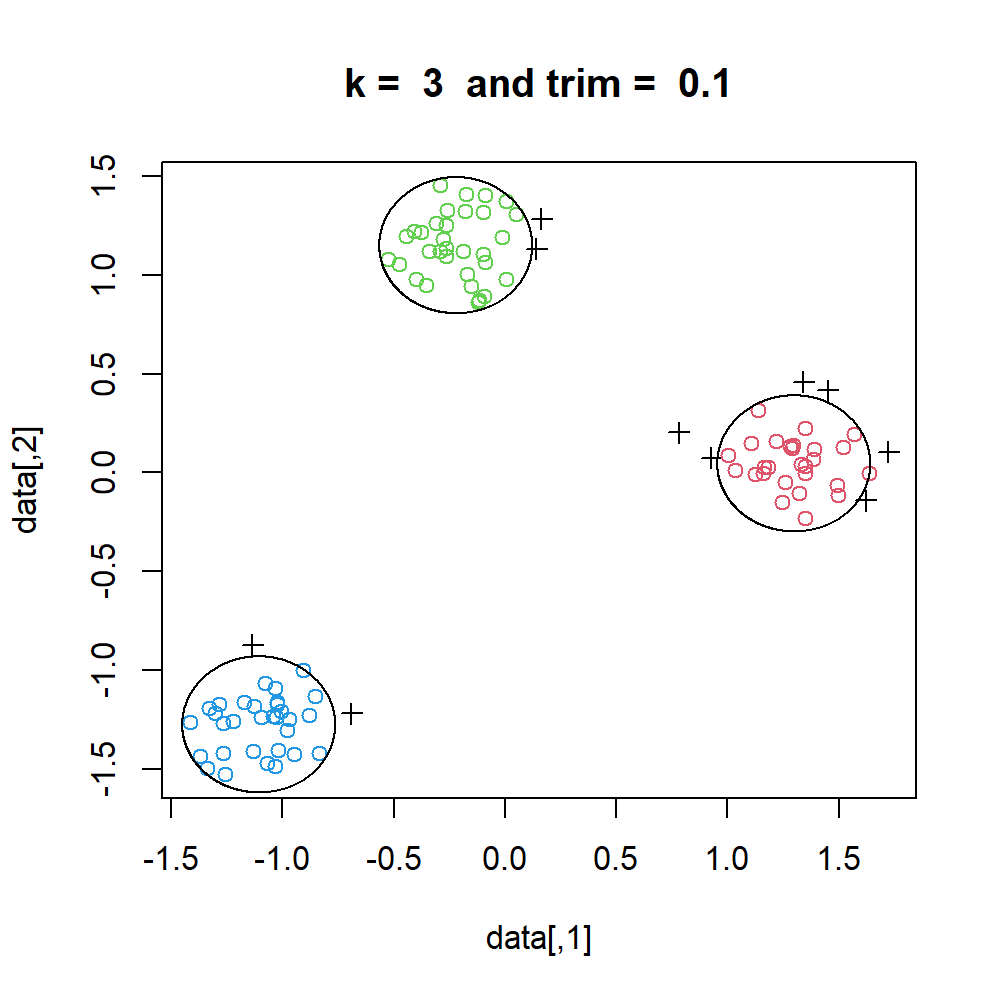

In [5]:
%%R -i X_train,centers -w 5 -h 5 --units in -r 200

library(trimcluster)

tkm1 <- trimkmeans(X_train, k=centers, trim=0.1, runs=3)
plot(tkm1, X_train)

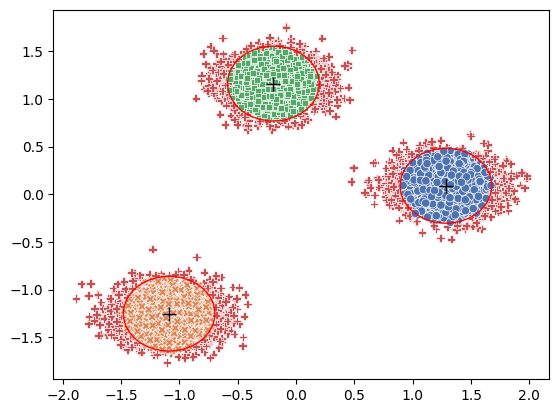

In [6]:
#trimmedkmeans 10000 samples three centers
centers = 3
X_train, true_labels = make_blobs(n_samples=10000, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)

class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in trimkmeans.centroids],
         [y for _, y in trimkmeans.centroids],
         'k+',
         markersize=10,
         )

for idx, centroid in enumerate(trimkmeans.centroids):
    circle = plt.Circle(centroid, trimkmeans.cutoff_ranges[idx], fill=False, color='r')
    plt.gca().add_patch(circle)
plt.show()

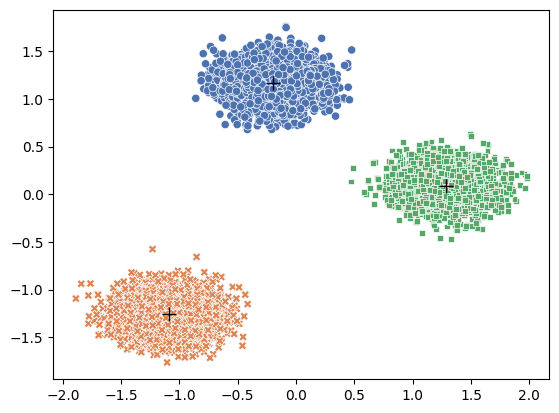

In [7]:
#kmeans 10000 samples three centers
centers = 3
X_train, true_labels = make_blobs(n_samples=10000, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

kmeans = KMeans(n_clusters=centers, random_state=42)
kmeans.fit(X_train)

classification = kmeans.predict(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.cluster_centers_],
         [y for _, y in kmeans.cluster_centers_],
         'k+',
         markersize=10,
         )


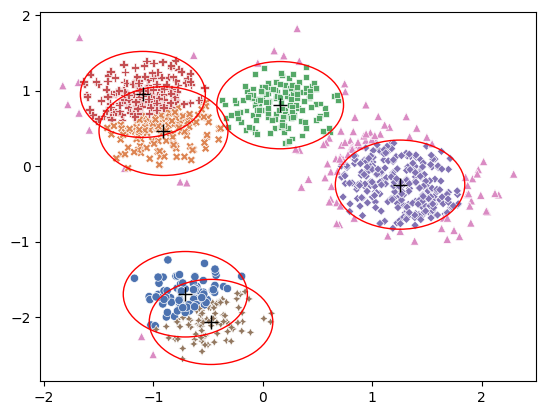

In [38]:
#create a less evenly distributed dataset so metrics will not generate perfect scores and a clearer comparison can be achieved

centers = 6
X_train, true_labels = make_blobs(n_samples=1000, centers=centers, random_state=42, cluster_std=1.5)
X_train = StandardScaler().fit_transform(X_train)

trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)

class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in trimkmeans.centroids],
         [y for _, y in trimkmeans.centroids],
         'k+',
         markersize=10,
         )

for idx, centroid in enumerate(trimkmeans.centroids):
    circle = plt.Circle(centroid, trimkmeans.cutoff_ranges[idx], fill=False, color='r')
    plt.gca().add_patch(circle)
plt.show()

In [28]:
#remove all the trimmed points (label = n_centers) since they would interfier with the Silhouette score
def trimmed_kmeans_silhouette_score(X_train, classification, centers):
    zipped = zip(X_train, classification)
    zipped_list = list(zipped)
    removed_trimmed = [i for i in zipped_list if i[1] != centers]
    #print(len(removed_trimmed))
    X_train_removed_trimmed, classification_removed_trimmed = list(zip(*removed_trimmed))
    #Silhouette score for trimmed kmeans n_samples=10000, centers = 6, cluster_std=1.5
    return metrics.silhouette_score(X_train_removed_trimmed, classification_removed_trimmed, metric='euclidean')


In [ ]:
trimmed_kmeans_silhouette_score(X_train, classification, centers)

<AxesSubplot: >

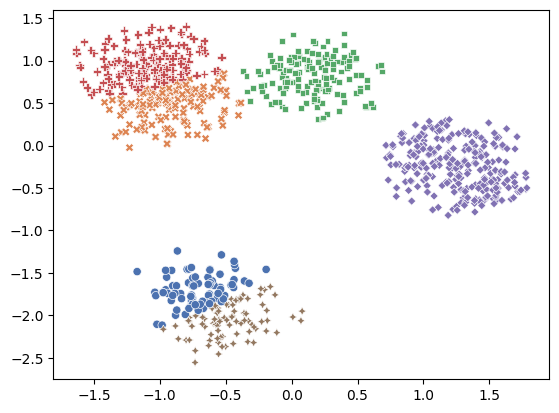

In [40]:
#visualization of trimmed clusters
#sns.scatterplot(x=[X[0] for X in X_train_removed_trimmed],
#                y=[X[1] for X in X_train_removed_trimmed],
#                hue=classification_removed_trimmed,
#                style=classification_removed_trimmed,
#                palette="deep",
#                legend=None
#                )

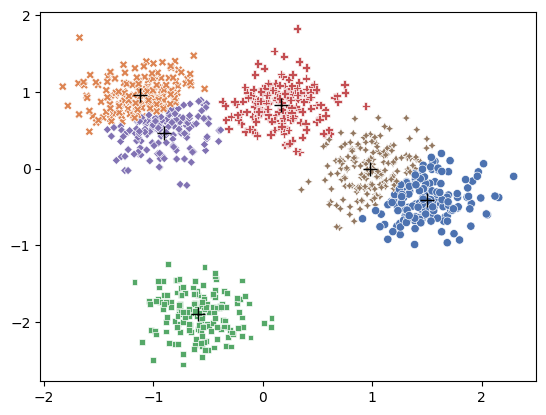

In [41]:
centers = 6
X_train, true_labels = make_blobs(n_samples=1000, centers=centers, random_state=42, cluster_std=1.5)
X_train = StandardScaler().fit_transform(X_train)

kmeans = KMeans(n_clusters=centers, random_state=42)
kmeans.fit(X_train)

classification = kmeans.predict(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.cluster_centers_],
         [y for _, y in kmeans.cluster_centers_],
         'k+',
         markersize=10,
         )


In [42]:
#Silhouette score for kmeans n_samples=1000, centers = 6, cluster_std=1.5
metrics.silhouette_score(X_train, classification, metric='euclidean')

0.4794009599894454

In [56]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=1.5)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.silhouette_score(X_train, classification, metric='euclidean'))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_silhouette_score(X_train, classification, centers))
    
print("Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 5 runs
Kmeans:  0.52
Trimmed Kmeans:  0.55


In [62]:
centers = 10

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=1.5)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.silhouette_score(X_train, classification, metric='euclidean'))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_silhouette_score(X_train, classification, centers))
    
print("Average Silhouette Score for , n_smaples = 1000, centers = 10, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Average Silhouette Score for , n_smaples = 1000, centers = 10, cluster_std=1.5 over 20 runs
Kmeans:  0.42
Trimmed Kmeans:  0.44


In [63]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=2)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.silhouette_score(X_train, classification, metric='euclidean'))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_silhouette_score(X_train, classification, centers))
    
print("Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=2 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=2 over 20 runs
Kmeans:  0.45
Trimmed Kmeans:  0.48


In [64]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=1.5)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.silhouette_score(X_train, classification, metric='euclidean'))
    
    trimkmeans = TrimKMeans(n_clusters=centers, trim=0.3)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_silhouette_score(X_train, classification, centers))
    
print("Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans with 30% trim: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs
Kmeans:  0.53
Trimmed Kmeans with 30% trim:  0.54


In [86]:
#remove all the trimmed points labels (label = n_centers) since they would interfier with the supervised metric
def trimmed_kmeans_metric_supervised(true_labels, classification, centers, metric):
    if metric not in ['rand_score', 'completeness_score']:
        raise ValueError("metric must be either 'rand_score' or 'completeness_score'")
    zipped = zip(true_labels, classification)
    zipped_list = list(zipped)
    removed_trimmed = [i for i in zipped_list if i[1] != centers]
    true_label_removed_trimmed, classification_removed_trimmed = list(zip(*removed_trimmed))
    if metric == 'rand_score':
        return metrics.rand_score(true_label_removed_trimmed, classification_removed_trimmed)
    elif metric == 'completeness_score':
        return metrics.completeness_score(true_label_removed_trimmed, classification_removed_trimmed)
    else:
        raise ValueError("this shouldn't happen")

In [71]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=1.5)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.rand_score(true_labels, classification))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_metric_supervised(true_labels, classification, centers, metric = 'rand_score'))
    
print("Average Rand index for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

Average Rand index for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs
Kmeans:  0.94
Trimmed Kmeans:  0.92


In [72]:
centers = 10

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=1.5)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.rand_score(true_labels, classification))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_metric_supervised(true_labels, classification, centers, metric = 'rand_score'))
    
print("Average Rand index for , n_smaples = 1000, centers = 10, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Average Rand index for , n_smaples = 1000, centers = 10, cluster_std=1.5 over 20 runs
Kmeans:  0.93
Trimmed Kmeans:  0.91


In [82]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=4)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.rand_score(true_labels, classification))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_metric_supervised(true_labels, classification, centers, metric = 'rand_score'))
    
print("Average Rand index for , n_smaples = 1000, centers = 5, cluster_std=4 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

Average Rand index for , n_smaples = 1000, centers = 5, cluster_std=2 over 20 runs
Kmeans:  0.8
Trimmed Kmeans:  0.78


<AxesSubplot: >

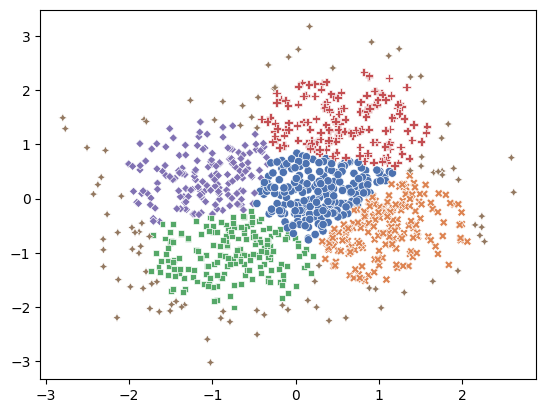

In [83]:
#visualization of std=4 clusters
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )

In [87]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=1.5)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.rand_score(true_labels, classification))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_metric_supervised(true_labels, classification, centers, metric = 'completeness_score'))
    
print("Average Completness Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

Average Rand index for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs
Kmeans:  0.91
Trimmed Kmeans:  0.75


In [89]:
centers = 10

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=1.5)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.rand_score(true_labels, classification))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_metric_supervised(true_labels, classification, centers, metric = 'completeness_score'))
    
print("Average Completness Score for , n_smaples = 1000, centers = 10, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Average Completness Score for , n_smaples = 1000, centers = 10, cluster_std=1.5 over 20 runs
Kmeans:  0.93
Trimmed Kmeans:  0.73


In [88]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_blobs(n_samples=1000, centers=centers, cluster_std=4)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.rand_score(true_labels, classification))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_metric_supervised(true_labels, classification, centers, metric = 'completeness_score'))
    
print("Average Completness Score for , n_smaples = 1000, centers = 5, cluster_std=4 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Average Rand index for , n_smaples = 1000, centers = 5, cluster_std=4 over 20 runs
Kmeans:  0.78
Trimmed Kmeans:  0.37


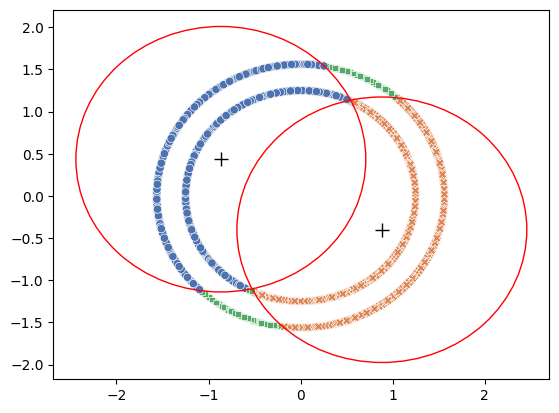

In [2]:
#trimmedkmeans 1000 samples from make_circles
centers = 2
X_train, true_labels = make_circles(n_samples=1000, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in trimkmeans.centroids],
         [y for _, y in trimkmeans.centroids],
         'k+',
         markersize=10,
         )

for idx, centroid in enumerate(trimkmeans.centroids):
    circle = plt.Circle(centroid, trimkmeans.cutoff_ranges[idx], fill=False, color='r')
    plt.gca().add_patch(circle)
plt.show()

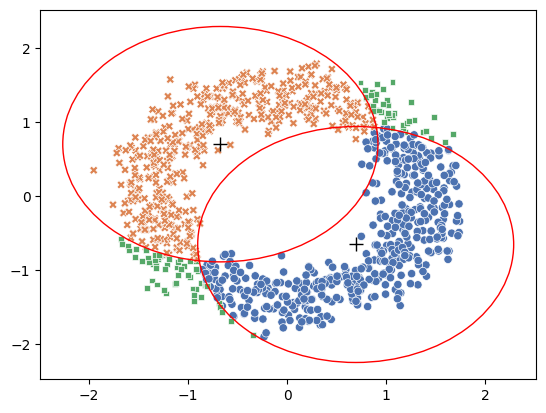

In [3]:
#trimmedkmeans 1000 samples from make_circles with noise
centers = 2
X_train, true_labels = make_circles(n_samples=1000, noise=0.1, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in trimkmeans.centroids],
         [y for _, y in trimkmeans.centroids],
         'k+',
         markersize=10,
         )

for idx, centroid in enumerate(trimkmeans.centroids):
    circle = plt.Circle(centroid, trimkmeans.cutoff_ranges[idx], fill=False, color='r')
    plt.gca().add_patch(circle)
plt.show()

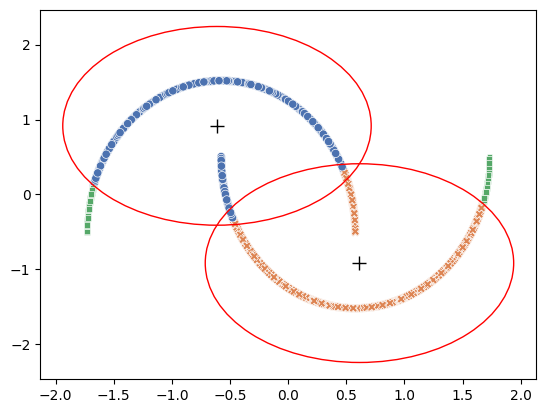

In [5]:
#trimmedkmeans 1000 samples from make_moons
centers = 2
X_train, true_labels = make_moons(n_samples=1000, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in trimkmeans.centroids],
         [y for _, y in trimkmeans.centroids],
         'k+',
         markersize=10,
         )

for idx, centroid in enumerate(trimkmeans.centroids):
    circle = plt.Circle(centroid, trimkmeans.cutoff_ranges[idx], fill=False, color='r')
    plt.gca().add_patch(circle)
plt.show()

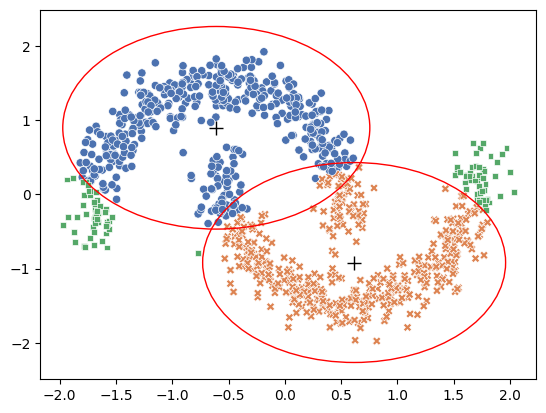

In [6]:
#trimmedkmeans 1000 samples from make_moons with noise
centers = 2
X_train, true_labels = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in trimkmeans.centroids],
         [y for _, y in trimkmeans.centroids],
         'k+',
         markersize=10,
         )

for idx, centroid in enumerate(trimkmeans.centroids):
    circle = plt.Circle(centroid, trimkmeans.cutoff_ranges[idx], fill=False, color='r')
    plt.gca().add_patch(circle)
plt.show()

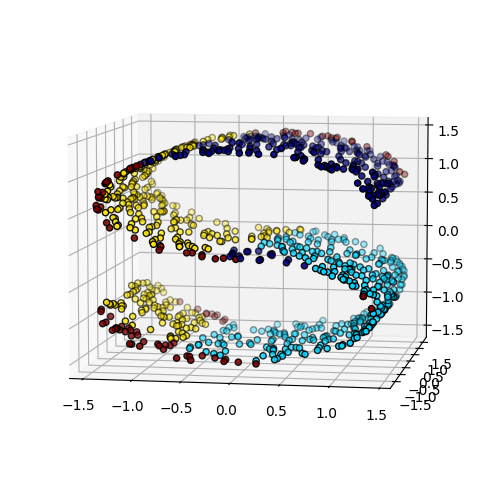

In [23]:
#trimmedkmeans 1000 samples from make_s_curve
centers = 3
X_train, true_labels = make_s_curve(n_samples=1000, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(classification):
    ax1.scatter(
        X_train[classification == l, 0],
        X_train[classification == l, 1],
        X_train[classification == l, 2],
        color=plt.cm.jet(float(l) / np.max(classification)),
        s=20,
        edgecolor="k",
    )

In [29]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_s_curve(n_samples=1000, random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.silhouette_score(X_train, classification, metric='euclidean'))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_silhouette_score(X_train, classification, centers))
    
print("Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs
Kmeans:  0.31
Trimmed Kmeans:  0.35


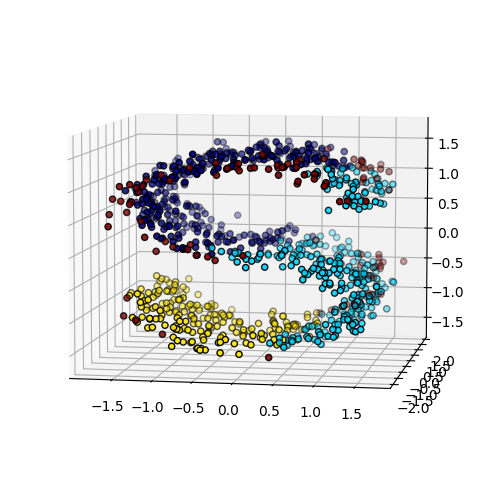

In [24]:
#trimmedkmeans 1000 samples from make_s_curve with noise
centers = 3
X_train, true_labels = make_s_curve(n_samples=1000, noise=0.1, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(classification):
    ax1.scatter(
        X_train[classification == l, 0],
        X_train[classification == l, 1],
        X_train[classification == l, 2],
        color=plt.cm.jet(float(l) / np.max(classification)),
        s=20,
        edgecolor="k",
    )

In [30]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_s_curve(n_samples=1000, noise=0.1, random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.silhouette_score(X_train, classification, metric='euclidean'))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_silhouette_score(X_train, classification, centers))
    
print("Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs
Kmeans:  0.31
Trimmed Kmeans:  0.35


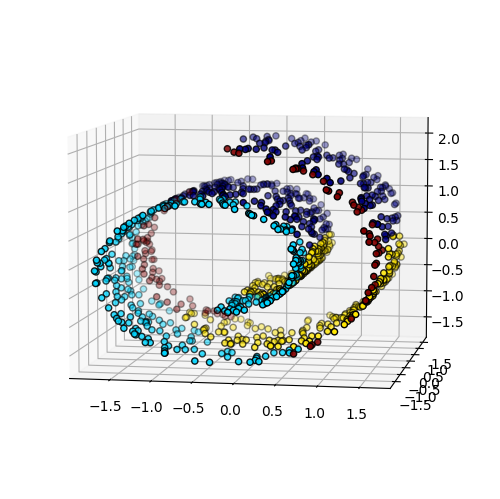

In [25]:
#trimmedkmeans 1000 samples from make_swiss_roll
centers = 3
X_train, true_labels = make_swiss_roll(n_samples=1000, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(classification):
    ax1.scatter(
        X_train[classification == l, 0],
        X_train[classification == l, 1],
        X_train[classification == l, 2],
        color=plt.cm.jet(float(l) / np.max(classification)),
        s=20,
        edgecolor="k",
    )

In [31]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_swiss_roll(n_samples=1000, random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.silhouette_score(X_train, classification, metric='euclidean'))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_silhouette_score(X_train, classification, centers))
    
print("Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

C:\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs
Kmeans:  0.29
Trimmed Kmeans:  0.32


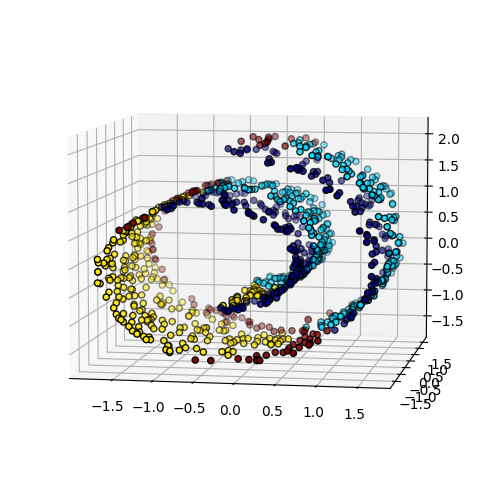

In [26]:
#trimmedkmeans 1000 samples from make_swiss_roll with noise
centers = 3
X_train, true_labels = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
trimkmeans = TrimKMeans(n_clusters=centers)
trimkmeans.fit(X_train)
# View results
class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(classification):
    ax1.scatter(
        X_train[classification == l, 0],
        X_train[classification == l, 1],
        X_train[classification == l, 2],
        color=plt.cm.jet(float(l) / np.max(classification)),
        s=20,
        edgecolor="k",
    )

In [32]:
centers = 5

results_kmeans = []
results_trimmed_kmeans = []
for i in range(20):
    
    X_train, true_labels = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)
    X_train = StandardScaler().fit_transform(X_train)
    kmeans = KMeans(n_clusters=centers) 
    kmeans.fit(X_train)
    classification = kmeans.predict(X_train)
    results_kmeans.append(metrics.silhouette_score(X_train, classification, metric='euclidean'))
    
    trimkmeans = TrimKMeans(n_clusters=centers)
    trimkmeans.fit(X_train)
    class_centers, classification, cutoff_ranges = trimkmeans.evaluate(X_train)
    results_trimmed_kmeans.append(trimmed_kmeans_silhouette_score(X_train, classification, centers))
    
print("Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs")
print( "Kmeans: ", round(sum(results_kmeans)/len(results_kmeans), 2))
print("Trimmed Kmeans: ", round(sum(results_trimmed_kmeans)/len(results_trimmed_kmeans), 2))

Average Silhouette Score for , n_smaples = 1000, centers = 5, cluster_std=1.5 over 20 runs
Kmeans:  0.3
Trimmed Kmeans:  0.32
